### What is Principal Component Analysis (PCA)?

The Principal Component Analysis is a popular unsupervised learning technique for reducing the dimensionality of large data sets. It increases interpretability yet, at the same time, it minimizes information loss. It helps to find the most significant features in a dataset and makes the data easy for plotting in 2D and 3D. PCA helps in finding a sequence of linear combinations of variables.
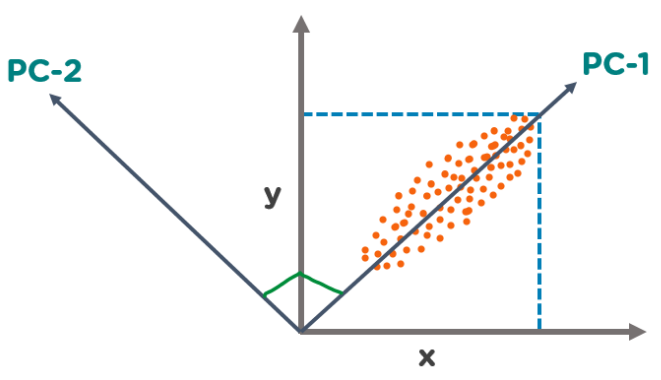
Ref-https://www.simplilearn.com/tutorials/machine-learning-tutorial/principal-component-analysis

### Principal Components (PCs)
The Principal Components are a straight line that captures most of the variance of the data. They have a direction and magnitude. Principal components are orthogonal projections (perpendicular) of data onto lower-dimensional space.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)
num_points = 50

# Generate random values for X and Y
X = np.random.rand(num_points)
Y = np.random.rand(num_points)

# Create a linear relationship with some noise for Z
slope = 2
intercept = 1
noise = np.random.normal(0, 0.1, num_points)
Z = slope * X + intercept * Y + noise

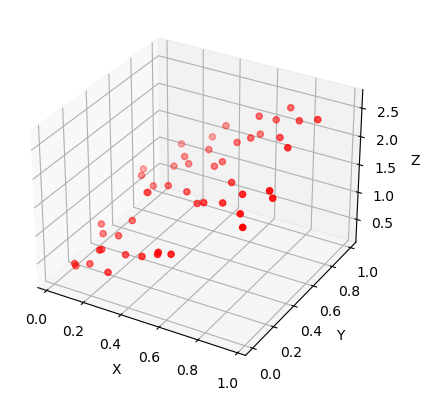

In [2]:
# Plot the 3D dataset
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c='r', marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [3]:
# Organize the data into a 3D array
dataset_3d = np.array([[[x, y, z] for x, y, z in zip(X, Y, Z)]])
dataset_3d.ndim

3

In [4]:
# finding PCs
dataset_3d_centered = dataset_3d - dataset_3d.mean(axis=0)
U, s, Vt = np.linalg.svd(dataset_3d_centered)

pc1 = Vt[0]
pc1

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [5]:
W2 = Vt[:2].T
X2D = dataset_3d_centered @ W2

### PCA Using Scikit-Learn

In [6]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95) # 95% information of the dataset
X_train_reduced = pca.fit_transform(X_train)
pca.n_components_

154

In [8]:
X_train.shape[1]

784

### Using PCA as Data Preprocessing Step
For classification task, we can tune the number of dimentions then select the best number of dimentions with other hyperparameter.

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

clf = make_pipeline(
    PCA(random_state=42),
    RandomForestClassifier(random_state=42)
)

param_distributions = {
    "pca__n_components": np.arange(10, 80),
    "randomforestclassifier__n_estimators": np.arange(50,500)
}

rnd_search = RandomizedSearchCV(clf, param_distributions, n_iter=10, cv=3, random_state=42)
rnd_search.fit(X_train[:1000], y_train[:1000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       6...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42)

In [10]:
rnd_search.best_params_

{'randomforestclassifier__n_estimators': 465, 'pca__n_components': 23}

In [11]:
import pandas as pd

rnd_search_result = pd.DataFrame(rnd_search.cv_results_)
rnd_search_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__n_estimators,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.416397,0.324155,0.038105,0.003175,304,62,"{'randomforestclassifier__n_estimators': 304, ...",0.862275,0.855856,0.849850,0.855994,0.005074,2
1,1.098934,0.145649,0.016618,0.004711,95,45,"{'randomforestclassifier__n_estimators': 95, '...",0.832335,0.867868,0.840841,0.847015,0.015149,6
2,2.588367,0.369571,0.055396,0.004167,460,11,"{'randomforestclassifier__n_estimators': 460, ...",0.820359,0.843844,0.804805,0.823003,0.016047,10
3,3.504739,0.242162,0.076281,0.010790,490,21,"{'randomforestclassifier__n_estimators': 490, ...",0.844311,0.846847,0.831832,0.840997,0.006563,9
4,1.862899,0.064436,0.019855,0.000186,152,76,"{'randomforestclassifier__n_estimators': 152, ...",0.850299,0.846847,0.834835,0.843994,0.006628,8
5,5.205291,0.287181,0.060058,0.008220,475,57,"{'randomforestclassifier__n_estimators': 475, ...",0.847305,0.855856,0.849850,0.851004,0.003585,4
6,2.945745,0.288639,0.036669,0.004727,314,36,"{'randomforestclassifier__n_estimators': 314, ...",0.856287,0.846847,0.852853,0.851996,0.003901,3
7,0.884100,0.164468,0.013312,0.004713,84,35,"{'randomforestclassifier__n_estimators': 84, '...",0.859281,0.849850,0.837838,0.848990,0.008775,5
8,1.253778,0.036763,0.013754,0.005292,118,59,"{'randomforestclassifier__n_estimators': 118, ...",0.832335,0.855856,0.846847,0.845013,0.009689,7
9,3.063163,0.139048,0.066540,0.009616,465,23,"{'randomforestclassifier__n_estimators': 465, ...",0.862275,0.858859,0.849850,0.856995,0.005241,1


### PCA for Compression
After dimentionality reduction, the training set takes up much less space. We're now holding 95% information with only 154 examples out 784 examples.

However, it is also possible to get back the original dataset by applying inverse transformation. It will be exactly the same dataset we had before but close. The mean squared error between the original data and reconstructed data is called reconstruction error.

### Randomized PCA
If we set the svd_solver hyperparameter to "randomized", Scikit-Learn uses a stochastic algorithm called Randomized PCA that quickly finds an approximation of the first a principal components.

In [12]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_train_reduced = rnd_pca.fit_transform(X_train)

By default, svd_solver is actually set to "auto": Scikit-Learn autometically uses the Randomized PCA algorithm if max(r,c) >=500 and and n_components is an integer smller than 80% of min(r,c).

### Increamental PCA (IPCA)
One problem with preciding PCA is that they require the whole training set to fit in memory in order for the algorithm to run. Fortunately, IPCA uses mini-batches to train the algorithms.

In [13]:
from sklearn.decomposition import IncrementalPCA

n_mini_batches = 100
inc_pca = IncrementalPCA(n_components=154)

for X_batch in np.array_split(X_train, n_mini_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

#### Alternatively, we can use Numpy's memmap class, which allows you to manipulate a large array sorted in a binary filr on disk as if it were entirely in memory; the class loads only the data in memory when it needs it.

In [14]:
filename = "my_mnist.mmap"
X_train_mini = X_train[:10_000].copy()
X_mmap = np.memmap(filename, dtype='float32', mode='write', shape=X_train_mini.shape)
X_mmap[:] = X_train_mini # saving data chunk by chunk
X_mmap.flush()

In [15]:
X_mmap = np.memmap(filename, dtype='float32', mode='readonly').reshape(-1, 784)
batch_size = X_mmap.shape[0]  # n_mini_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mmap)

IncrementalPCA(batch_size=10000, n_components=154)